## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note: I set a random seed to ensure my code was reproducible, especially with the capacity of the dataset.

In [2]:
np.random.seed(42)

### Unzipping and Merging Datasets

The datasets, Book_ratings.csv and books_data.csv, were obtained from [Kaggle](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews). Due to the size of the datasets, I unzipped the csv zip files through Jupyter Notebook and deleted them from my data/ folder after creating DataFrames. The Book_ratings.csv had scrapped book reviews from Amazon between May 1996 - July 2014, resulting in 3 million rows and over 200K unique books. The books_data.csv used the Google Books API to retrieve book details on these unique titles. 

I merged Book_ratings.csv and books_data.csv into one DataFrame on their shared column 'Title'.

In [3]:
#!unzip -q "./data/Books_rating.csv.zip"

In [4]:
#!unzip -q "./data/books_data.csv.zip"

In [5]:
book_ratings = pd.read_csv('data/Books_rating.csv')

In [6]:
book_details = pd.read_csv('data/books_data.csv')

Here, we evaluate which column to use when merging the DataFrames. The merge takes the details_df and matches the 'Title' to their respective matches in rating_df.

In [7]:
book_ratings.head(2)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...


In [8]:
book_details.head(2)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [9]:
df = pd.merge(book_ratings, book_details, on = 'Title')

### Cleaning Data

Early on, I decided to drop Id, Price, User_id, review/helpfulness, review/time, publisher, publishedDate, previewLink, and infoLink as they were either redundant information or did not provide any context that I thought to be useful. From here, I found the null values to understand what was missing in my DataFrame and if there was a pattern to these missing values. For some columns, like ratingsCount, more than a third of the data was missing. I noticed that oftentimes it was the same author missing data for their books. This aspect posed a dilemma as the data was scraped, and replacing these missing values with the original content (e.g. description, review/text) may create bias within our models and outside my skill set. For future model builders, they could re-scrape the data, but may be difficult as they would need to match up user_id's and hope that data has not been deleted from Amazon while still aligning with this dataset. 

Ultimately, I decided to drop all rows with any null values, knowing that I would still be left with a sizable dataset to use with all columns filled.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000000 entries, 0 to 2999999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
 10  description         object 
 11  authors             object 
 12  image               object 
 13  previewLink         object 
 14  publisher           object 
 15  publishedDate       object 
 16  infoLink            object 
 17  categories          object 
 18  ratingsCount        float64
dtypes: float64(3), int64(1), object(15)
memory usage: 457.8+ MB


In [11]:
df.drop(columns = ['Id',
                   'Price',
                   'User_id',
                   'review/helpfulness',
                   'review/time',
                   'publisher',
                   'publishedDate',
                   'previewLink',
                   'infoLink'], inplace = True)

In [12]:
df.isnull().sum()

Title                 208
profileName        561886
review/score            0
review/summary         38
review/text             8
description        640225
authors            390634
image              540306
categories         551498
ratingsCount      1360694
dtype: int64

Note: We see examples like "Ghost Story" or "Shecky's Bar, Club, and Lounge Guide for Chicago" have multiple reviews, but are all missing the same data columns. The reason for this is unknown, but could be connected to the available information at the time of web-scraping.

In [13]:
df[df['ratingsCount'].isnull()]

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,Its Only Art If Its Well Hung!,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,['Biography & Autobiography'],NaN
2,Dr. Seuss: American Icon,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,['Biography & Autobiography'],NaN
3,Dr. Seuss: American Icon,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,['Biography & Autobiography'],NaN
4,Dr. Seuss: American Icon,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,['Biography & Autobiography'],NaN
...,...,...,...,...,...,...,...,...,...,...
2999984,Ghost Story,Nicholas Pfeiffer,5.0,Great deal. thanks for the quick ship.,So far it is a really good book. I was very ha...,#1 New York Times bestselling author Peter Str...,['Peter Straub'],http://books.google.com/books/content?id=s_P2D...,['Fiction'],NaN
2999985,Ghost Story,Bill F. Mccann Jr.,5.0,Shivers me timbers!!!!!,"The best ""ghost story"" I've ever read. Don't b...",#1 New York Times bestselling author Peter Str...,['Peter Straub'],http://books.google.com/books/content?id=s_P2D...,['Fiction'],NaN
2999986,Ghost Story,Kim Klein,5.0,Great Transactions!,It was a great transaction! The book was descr...,#1 New York Times bestselling author Peter Str...,['Peter Straub'],http://books.google.com/books/content?id=s_P2D...,['Fiction'],NaN
2999987,Ghost Story,James Janiesch,5.0,unbelievable condition,"Purchased ""Ghost Story"" from ""Wonderbook and V...",#1 New York Times bestselling author Peter Str...,['Peter Straub'],http://books.google.com/books/content?id=s_P2D...,['Fiction'],NaN


In [14]:
df[df['description'].isnull()]

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,Its Only Art If Its Well Hung!,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,['Comics & Graphic Novels'],NaN
46,"Nation Dance: Religion, Identity and Cultural ...",Pink Noodle,5.0,interplay of traditions across Caribbean,from publisher:Addresses the interplay of dive...,NaN,['Edward Long'],NaN,NaN,NaN
51,The Overbury affair (Avon),lisamac,3.0,Overbury,Full of intrigue and a good overview of the co...,NaN,['Miriam Allen De Ford'],NaN,NaN,NaN
52,A Walk in the Woods: a Play in Two Acts,Vinny Wolf,5.0,meaty and fast,"This play was excellent. It's very smart, inte...",NaN,['Lee Blessing'],NaN,NaN,3.0
53,A Walk in the Woods: a Play in Two Acts,Shirleyann Costigan,4.0,Surprisingly delightful,This is a fast read filled with unexpected hum...,NaN,['Lee Blessing'],NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...
2999940,"Shecky's Bar, Club and Lounge Guide for Chicago","American Express Giftcard ""Lele""",5.0,DEAD ON,"What's lame is lame and what's fun is fun, the...",NaN,['Chris Hoffman'],http://books.google.com/books/content?id=1ypxP...,['Travel'],NaN
2999941,"Shecky's Bar, Club and Lounge Guide for Chicago",Rick B.,4.0,Dead-on reviews,I've had a copy of this book and enjoyed readi...,NaN,['Chris Hoffman'],http://books.google.com/books/content?id=1ypxP...,['Travel'],NaN
2999942,"Shecky's Bar, Club and Lounge Guide for Chicago",beer drinker,1.0,Shecky's is ...,Ugh. This book manages to take the colorful un...,NaN,['Chris Hoffman'],http://books.google.com/books/content?id=1ypxP...,['Travel'],NaN
2999943,"Shecky's Bar, Club and Lounge Guide for Chicago",Gregg Henris,3.0,Hip and Happen'n,A must-have for your coffee table or barstool....,NaN,['Chris Hoffman'],http://books.google.com/books/content?id=1ypxP...,['Travel'],NaN


In [15]:
df.dropna(subset = ['Title',
                    'profileName',
                    'review/summary',
                    'review/text',
                    'description',
                    'authors',
                    'image',
                    'categories',
                   'ratingsCount'], inplace = True)

In [16]:
df.isnull().sum()

Title             0
profileName       0
review/score      0
review/summary    0
review/text       0
description       0
authors           0
image             0
categories        0
ratingsCount      0
dtype: int64

Note: In columns 'authors' and 'categories', the data is structured with brackets and quotations around the value (e.g. Fiction was written as ['Fiction']) that I then removed by replacing them with spaces.

In [17]:
updating_columns = ['authors', 'categories']

In [18]:
for column in updating_columns:
    df[column] = df[column].map(lambda x: x.replace("[", "").replace("]", "").replace("'", "").replace("'", ""))

## Creating Subset Datasets

After removing the null values, I'm left with over 1 million rows of data which would take time to run through any model. I decided to create random samples of the dataset categorized by genres, reviews, and description. I performed a value_counts on the "categories" for the DataFrame to find Fiction, Juvenile Fiction, and Biography & Autobiography were the most-occurring types of books reviewed. In the histograms below, we note that the DataFrame is significantly left-skewed with a majority having less than 100 reviews on the book. Since we will have a random sample of the overall DataFrame, I created a dataset that are the most-reviewed of the DataFrame. All of the datasets were 50k because of memory capacity. 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175206 entries, 47 to 2999998
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Title           1175206 non-null  object 
 1   profileName     1175206 non-null  object 
 2   review/score    1175206 non-null  float64
 3   review/summary  1175206 non-null  object 
 4   review/text     1175206 non-null  object 
 5   description     1175206 non-null  object 
 6   authors         1175206 non-null  object 
 7   image           1175206 non-null  object 
 8   categories      1175206 non-null  object 
 9   ratingsCount    1175206 non-null  float64
dtypes: float64(2), object(8)
memory usage: 98.6+ MB


### Datasets of Top 3 Genres

In [20]:
df['categories'].value_counts()

Fiction                             505673
Juvenile Fiction                    117789
Biography & Autobiography            61204
Religion                             54970
History                              46531
                                     ...  
Broadway (New York, N.Y.)                1
Grandmothers                             1
Cinderella (Legendary character)         1
Punjab (India)                           1
Feminists                                1
Name: categories, Length: 1483, dtype: int64

In [21]:
fiction_df = df[df['categories'] == "Fiction"]
fiction_sample = fiction_df.sample(n = 50_000)

In [22]:
fiction_sample.to_csv('data/fiction_sample.csv', index = False)

In [23]:
jvf_df = df[df['categories'] == "Juvenile Fiction"]
jvf_sample = jvf_df.sample(n = 50_000)

In [24]:
jvf_sample.to_csv('data/jvf_sample.csv', index = False)

In [25]:
bio_df = df[df['categories'] == "Biography & Autobiography"]
bio_sample = bio_df.sample(n = 50_000)

In [26]:
bio_sample.to_csv('data/bio_sample.csv', index = False)

### Dataset with the High Number of Reviews

In [30]:
df['ratingsCount'].value_counts(ascending = False).sort_index()

1.0       175889
2.0       102489
3.0        71405
4.0        47078
5.0        40743
           ...  
4249.0      1211
4392.0        30
4562.0       618
4572.0         4
4895.0        13
Name: ratingsCount, Length: 461, dtype: int64

In [31]:
rating_counts = df['ratingsCount'].value_counts()

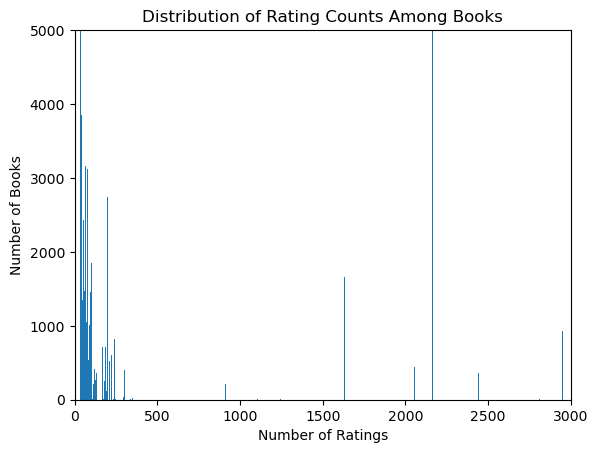

In [33]:
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.xlim(0, 3_000)
plt.ylim(0, 5_000) # taking into account outliers abov 
plt.title('Distribution of Rating Counts Among Books');

In [34]:
frame = df[(df['ratingsCount'] >= 0) & (df['ratingsCount'] <= 3000)]

In [35]:
frame_ratings = frame['ratingsCount'].value_counts()

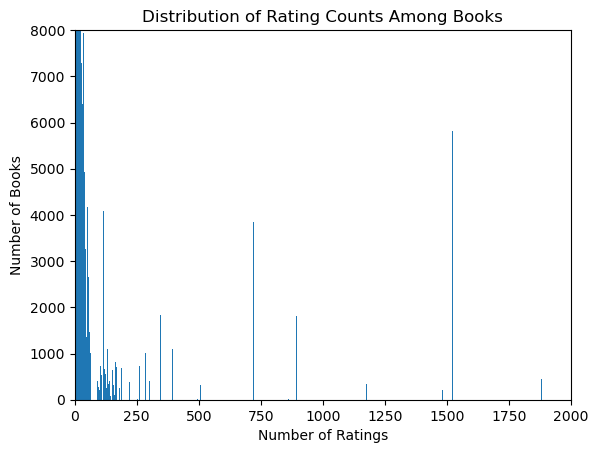

In [36]:
plt.bar(frame_ratings.index, frame_ratings.values)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.xlim(0, 2000)
plt.ylim(0, 8_000)
plt.title('Distribution of Rating Counts Among Books');

For this section, I made a random sample of books with a high review count based on what my histograms showed. I will have an overall sample of the DataFrame, so this condition will enable me to have a selection of "popular" books to recommend for others.

In [37]:
review_df = df[df['ratingsCount'] > 2000]
review_sample = review_df.sample(n = 50_000)

In [38]:
review_sample.to_csv('data/review_sample.csv', index = False)

### Dataset from Overall DataFrame

In [39]:
overall_sample = df.sample(n = 50_000)

In [40]:
overall_sample.to_csv('data/overall_sample.csv', index = False)

In [41]:
overall_sample['Title'].nunique() #14651 books reviewed

14651

In [42]:
overall_sample['profileName'].nunique() #39678 users that reviewed books

39678